In [1]:
data = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4"""

In [2]:
# keeping the actual input below commented,
# since the visualization at the end of this notebook
# makes more sense with the simplified input above,
# helping to understand the problem

# with open(f'05.txt', 'r') as file:
#     data = file.read().strip()

In [3]:
seeds = data.split('\n\n')[0].split(': ')[-1].split()
seeds = [int(seed) for seed in seeds]
print(f'seeds: \n{seeds}', end='\n\n')

iia_maps = data.split('\n\n')[1:]
iia_maps = [item.split(':\n')[1] for item in iia_maps]
iia_maps = [item.split('\n') for item in iia_maps]
iia_maps = [[item.split() for item in iia_map] for iia_map in iia_maps]
iia_maps = [[[int(number) for number in item] for item in iia_map] for iia_map in iia_maps]

print('iia_maps:')
for item in iia_maps:
    print(item)

seeds: 
[79, 14, 55, 13]

iia_maps:
[[50, 98, 2], [52, 50, 48]]
[[0, 15, 37], [37, 52, 2], [39, 0, 15]]
[[49, 53, 8], [0, 11, 42], [42, 0, 7], [57, 7, 4]]
[[88, 18, 7], [18, 25, 70]]
[[45, 77, 23], [81, 45, 19], [68, 64, 13]]
[[0, 69, 1], [1, 0, 69]]
[[60, 56, 37], [56, 93, 4]]


In [4]:
# imagining the path goes left to right,
# with this we get 
# seed -> destination

def get_destination(number):
    for iia_map in iia_maps:
        for data in iia_map:
            right_start, left_start, length = data
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
    return number


min_lowest_location = None
for seed in seeds:
    location = get_destination(seed)
    if not min_lowest_location or location < min_lowest_location:
        min_lowest_location = location

# puzzle 1
min_lowest_location

35

In [5]:
# the code below would similarly work, in theory.
# but the input is made to be computationally very demanding,
# therefore another strategy is needed...

# min_lowest_location = None
# for seed_band in seed_bands:
#     for seed in seed_band:
#         location = get_destination(seed)
#         if not min_lowest_location or location < min_lowest_location:
#             min_lowest_location = location
# 
# min_lowest_location

In [6]:
from itertools import batched

seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]

for item in seed_bands:
    print(item)

range(79, 92)
range(55, 67)


In [7]:
print('left-to-right and right-to-left dictionaries based on ranges\n')
guide_lr = {}
for level, map_numbers in enumerate(iia_maps):
    guide_lr[level] = {}
    for data in map_numbers:
        right_start, left_start, length = data
        guide_lr[level].update({range(left_start, left_start+length) : right_start - left_start})

for key, value in guide_lr.items():
    print(f'{key}: {value}')

print('')

guide_rl = {}
for level, map_numbers in guide_lr.items():
    guide_rl[level+1] = {}
    for rangex, delta in map_numbers.items():
        guide_rl[level+1].update({range(rangex.start+delta, rangex.stop+delta) : -delta})

for key, value in guide_rl.items():
    print(f'{key}: {value}')

left-to-right and right-to-left dictionaries based on ranges

0: {range(98, 100): -48, range(50, 98): 2}
1: {range(15, 52): -15, range(52, 54): -15, range(0, 15): 39}
2: {range(53, 61): -4, range(11, 53): -11, range(0, 7): 42, range(7, 11): 50}
3: {range(18, 25): 70, range(25, 95): -7}
4: {range(77, 100): -32, range(45, 64): 36, range(64, 77): 4}
5: {range(69, 70): -69, range(0, 69): 1}
6: {range(56, 93): 4, range(93, 97): -37}

1: {range(50, 52): 48, range(52, 100): -2}
2: {range(0, 37): 15, range(37, 39): 15, range(39, 54): -39}
3: {range(49, 57): 4, range(0, 42): 11, range(42, 49): -42, range(57, 61): -50}
4: {range(88, 95): -70, range(18, 88): 7}
5: {range(45, 68): 32, range(81, 100): -36, range(68, 81): -4}
6: {range(0, 1): 69, range(1, 70): -1}
7: {range(60, 97): -4, range(56, 60): 37}


In [8]:
# with this we get 
# (level, number) -> whole path

def get_path(level, number):
    
    levels_count = max(guide_lr.keys())+1
    path = [number]
    
    # left-to-right part
    current_level = level
    current_number = number
    while 0 <= current_level < levels_count:
        current_ranges = guide_lr[current_level].keys()
        for current_range in current_ranges:
            delta = guide_lr[current_level][current_range]
            if current_number in current_range:
                current_number += delta
                break
        path.append(current_number)
        current_level += 1
    
    # right-to-left part
    current_level = level
    current_number = number
    while 0 < current_level <= levels_count:
        current_ranges = guide_rl[current_level].keys()
        for current_range in current_ranges:
            delta = guide_rl[current_level][current_range]
            if current_number in current_range:
                current_number += delta
                break
        path.insert(0,current_number)
        current_level -= 1
    
    return path

In [9]:
# imagining the almanac like a map,
# here we get all the nodes where the seed branches split

range_nodes = []
for level, ranges in guide_lr.items():
    for current_range, delta in ranges.items():
        range_nodes.append((level, current_range.start))
        range_nodes.append((level, current_range.stop))
for level, ranges in guide_rl.items():
    for current_range, delta in ranges.items():
        range_nodes.append((level, current_range.start))
        range_nodes.append((level, current_range.stop))
range_nodes = list(set(range_nodes))
range_nodes.sort()

In [10]:
from copy import deepcopy

# those are all the paths passing through the nodes
nodes_paths = [tuple(get_path(*item)) for item in range_nodes]
nodes_paths = list(set(nodes_paths))

In [11]:
# getters based on band dictionaries
# band -> delta

# this is right-to-left version
# ending_num -> ending_range -> diff_with_orig -> orig_num

nodes_paths_rl = deepcopy(nodes_paths)
nodes_paths_rl.sort(key=lambda x : x[-1])

endings = list(map(lambda x : x[-1], nodes_paths_rl))
endings = [range(*ending) for ending in zip(endings[:-1], endings[1:])]
startings = list(map(lambda x : x[0], nodes_paths_rl))
deltas = [start - end.start for end, start in zip(endings, startings)]

def get_seed(destination):
    for band_range, delta in linear_rl.items():
        if destination in band_range:
            return destination + linear_rl[band_range]


# this is left-to-right version
# orig_num -> diff_with_orig -> ending_range -> ending_num

nodes_paths_lr = deepcopy(nodes_paths)
nodes_paths_lr.sort(key=lambda x : x[0])

linear_rl = dict(zip(endings, deltas))

startings = list(map(lambda x : x[0], nodes_paths_lr))
startings = [range(*start) for start in zip(startings[:-1], startings[1:])]
endings = list(map(lambda x : x[-1], nodes_paths_lr))
deltas = [end - start.start for start, end in zip(startings, endings)]

linear_lr = dict(zip(startings, deltas))

def get_destination(seed):
    for band_range, delta in linear_lr.items():
        if seed in band_range:
            return seed + linear_lr[band_range]

In [12]:
def get_destination_band():
    for destination_band in linear_rl.keys():
        for seed_band in seed_bands:
            if get_seed(destination_band.start) in seed_band:
                return destination_band

# puzzle 2
get_destination_band().start

46

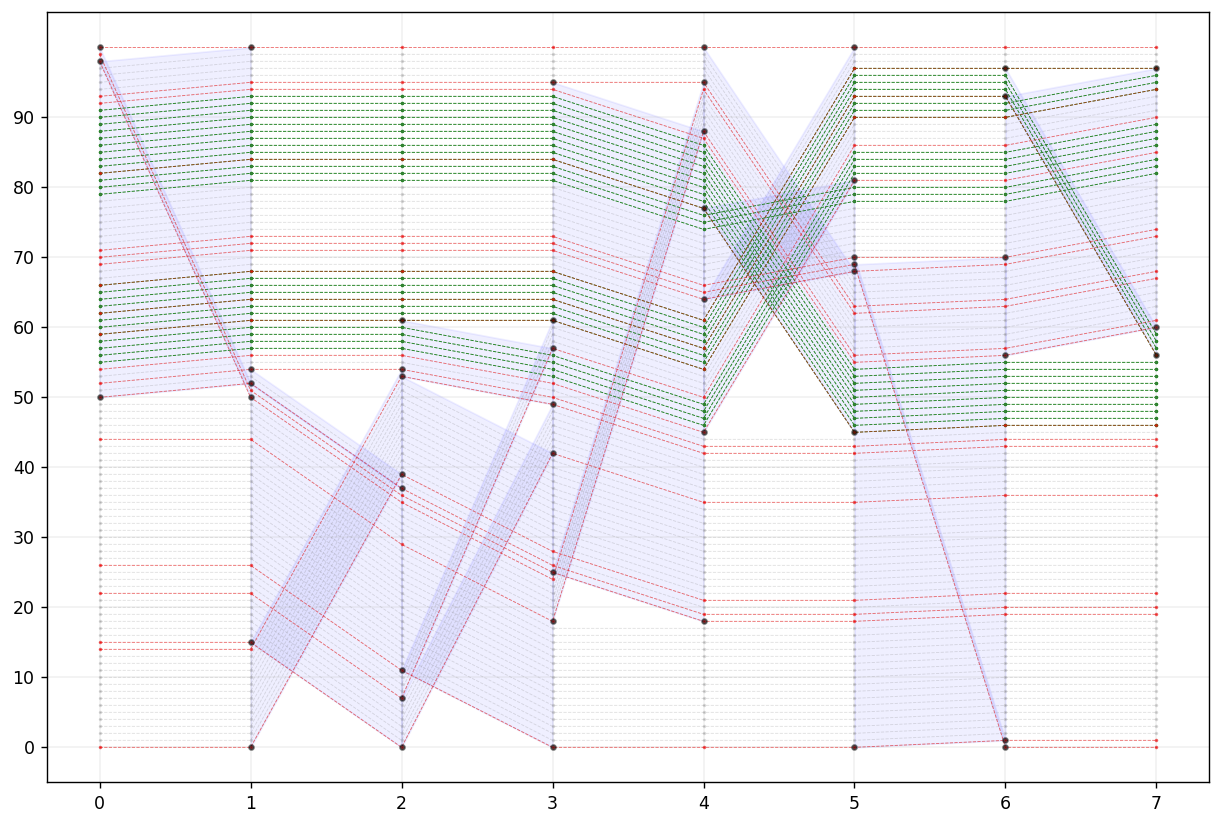

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi=125)

seed_paths = []
for seed_band in seed_bands:
    for seed in seed_band:
        seed_paths.append(get_path(0, seed))

for seed_path in seed_paths:
    ax.plot(range(len(seed_paths[0])), seed_path, c='green', ls='--', linewidth=0.5, marker='.', markersize=2, alpha=1)

seeds_all = [get_path(7, seed) for seed in range(101)]
for seed_path in seeds_all:
    ax.plot(range(len(seed_paths[0])), seed_path, c='gray', ls='--', linewidth=0.5, marker='.', markersize=2, alpha=0.25)

for nodes_path in nodes_paths:
    ax.plot(range(len(seed_paths[0])), nodes_path, c='red', ls='--', linewidth=0.5, marker='.', markersize=2, alpha=0.5)
    
for level, node in range_nodes:
    ax.scatter(level, node, c='black', s=8, alpha=0.5, zorder=100)

for index, iia_map in enumerate(iia_maps):
    for data in iia_map:
        right_start, left_start, length = data
        top = [left_start+length, right_start+length]
        bottom = [left_start, right_start]
        ax.fill_between([index, index+1], top, bottom, color='blue', linewidth=1, alpha=1/16)

max_value = max([max(item) for item in seed_paths])
ax.set_yticks(range(0, max_value, 10))
ax.grid(color='#bbbbbb', linestyle='-', linewidth=0.2)

plt.show()